In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
categorical=df.select_dtypes(include=['object']).columns

In [9]:
categorical

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [17]:
scale={}
for col in categorical:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    scale[col]=le
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,1,True,NaN,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,First,2,False,C,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,Third,2,False,NaN,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,First,2,False,C,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,Third,1,True,NaN,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,1,True,NaN,2,0,True
887,1,1,0,19.0,0,0,30.0000,2,First,2,False,B,2,1,True
888,0,3,0,NaN,1,2,23.4500,2,Third,2,False,NaN,2,0,False
889,1,1,1,26.0,0,0,30.0000,0,First,1,True,C,0,1,True


In [19]:
import numpy as np

In [21]:
x=df[['sex','survived','who']]
y=df['alive']

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy=accuracy_score(y_test,y_pred)

In [39]:
accuracy

1.0

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[105,   0],
       [  0,  74]], dtype=int64)

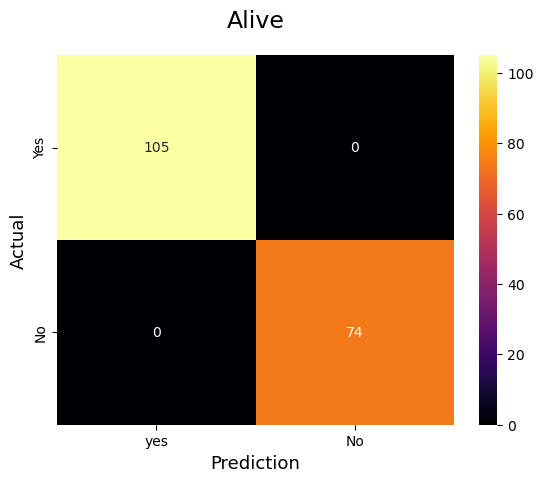

In [47]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='inferno',
            xticklabels=['yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Alive',fontsize=17,pad=20)
plt.show()

C:\Users\Diyanjali\AppData\Local\Temp\ipykernel_23452\3072203914.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="coolwarm")


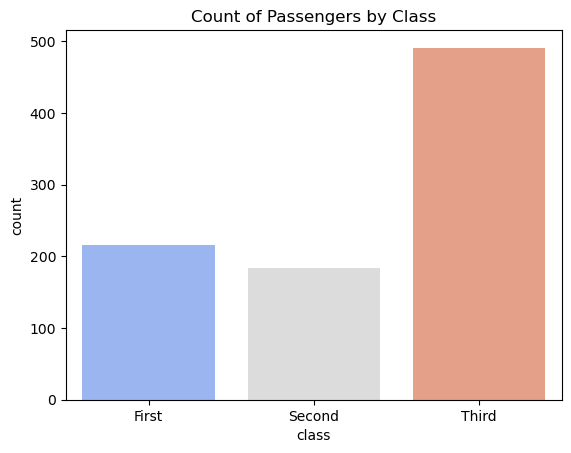

In [49]:
sns.countplot(x="class", data=df, palette="coolwarm")

plt.title("Count of Passengers by Class")
plt.show()

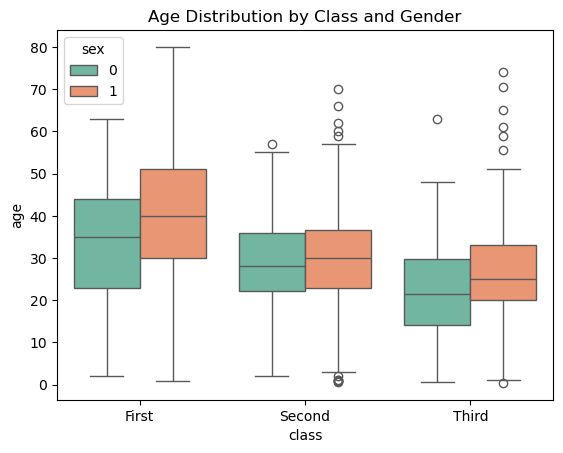

In [51]:
sns.boxplot(data=df, x="class", y="age", hue="sex", palette="Set2")

plt.title("Age Distribution by Class and Gender")
plt.show()

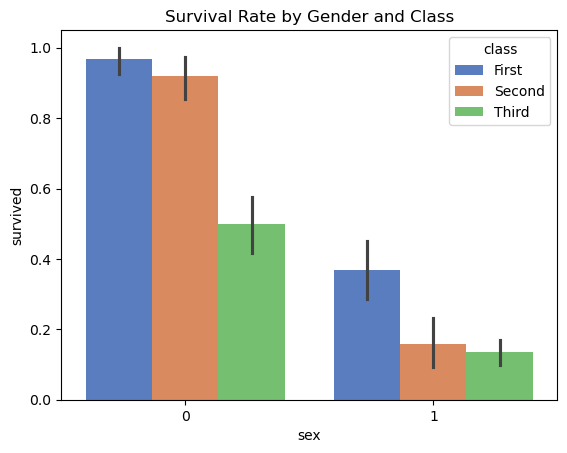

In [53]:
sns.barplot(data=df, x="sex", y="survived", hue="class", palette="muted")

plt.title("Survival Rate by Gender and Class")
plt.show()

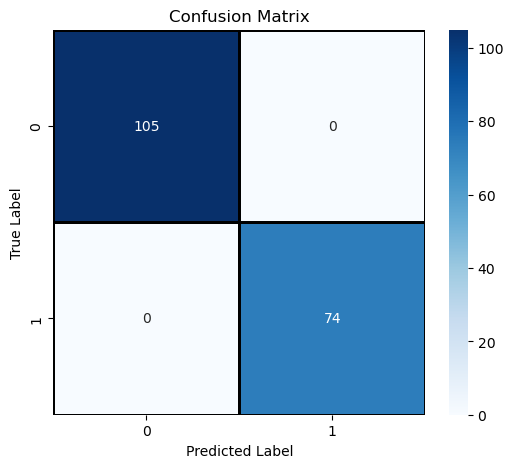

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example: Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()